<a class="anchor" id="0"></a>

# **Modelo ARIMA para el pronóstico de series temporales - statsmodels**

Discutiremos el **Modelo ARIMA para el pronóstico de series temporales**. 
- El modelo ARIMA se usa para pronosticar una serie temporal utilizando los valores pasados ​​de la serie. 
- Construiremos un **Modelo ARIMA óptimo** y lo ampliaremos a **ARIMA de temporada (Sarima)** y **Modelos Sarimax**. 
- También veremos cómo construir modelos Autoarima.

<a class="anchor" id="0.1"></a>
# **Tabla de contenidos** 


1. [Introducción al pronóstico de la serie temporal](#1)
2. [Introducción a los modelos ARIMA](#2)
3. [El significado de p, d y q en el modelo ARIMA](#3)
4. [Modelos AR y MA](#4)
5. [Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA](#5)
6. [Cómo encontrar el orden del término AR (p)](#6)
7. [Cómo encontrar el orden del término MA (q)](#7)
8. [Cómo manejar si una serie de tiempo está ligeramente debajo o más diferenciada](#8)
9. [Cómo construir el modelo ARIMA](#9)
10. [Encuentre el modelo ARIMA óptimo utilizando validación cruzada fuera del tiempo](#10)
11. [Métricas de precisión para el pronóstico de series de tiempo](#11)
12. [Previsión automática de ARIMA en Python](#12)
13. [Cómo interpretar los gráficos residuales en el modelo ARIMA](#13)
14. [Modelo Sarima en Python](#14)
15. [Modelo Sarimax con variables exogéneas](#15)
16. [Referencias](#16)

# **1.Introducción al pronóstico de series temporales** <a class="anchor" id="1"></a>

[Tabla de contenidos](#0.1)


- Una  **serie temproal** se define como una serie de puntos de datos registrados en diferentes intervalos de tiempo. El orden de tiempo puede ser diario, mensual o incluso anual.

- El pronóstico de series temporales es el proceso de usar un modelo estadístico para predecir valores futuros de una serie temporal basada en resultados pasados.

- El pronóstico es el paso en el que queremos predecir los valores futuros que tomará la serie. El pronóstico de una serie de tiempo a menudo es de tremendo valor comercial.

#### **Previsión de una serie temporal se puede dividir ampliamente en dos tipos.**

- Si usamos solo los valores anteriores de la serie temporal para predecir sus valores futuros, se llama **pronóstico de series temporales univariadas.**

- Si usamos otros predictores (como variables exógenas) para pronosticar que se llama **pronóstico de series temporales de variedades múltiples.**

Aquí nos centraremos en un tipo particular de método de pronóstico llamado **modelado ARIMA.**

# **2. Introducción a los modelos ARIMA** <a class="anchor" id="2"></a>

[Tabla de contenidos](#0.1)


**ARIMA** significa **Autoregressive Integrated Moving Average Model (Modelo de promedio móvil integrado autorregresivo)**.
- Pertenece a una clase de modelos que explica una serie temproal dada, basada en sus propios valores pasados: sus propios retrasos y los errores de pronóstico rezagados.
- La ecuación se puede usar para pronosticar valores futuros.
- Cualquier serie temporal "no estacional" que exhiba patrones y no sea un ruido blanco aleatorio se puede modelar con modelos ARIMA.
- Es un algoritmo de pronóstico basado en la idea de que la información en los valores pasados ​​de la serie temporal se puede usar por sí sola para predecir los valores futuros.


- **Los modelos ARIMA** se especifican mediante tres parámetros de orden: (p, d, q), 

dónde,
- *p* es el orden del término AR
- *q* es el orden del término MA
- *d* es el número de diferenciación requerida para hacer la serie temproal estacionaria


- **AR (p) Autorregresión** - Un modelo de regresión que utiliza la relación dependiente entre una observación actual y observaciones durante un período anterior. 
   - Un componente auto regresivo (AR (p)) se refiere al uso de valores pasados ​​en la ecuación de regresión para la serie temporal.


- **I (d) Integración** - utiliza la diferenciación de las observaciones (restando una observación de la observación en el paso de tiempo anterior) para hacer la serie temproal estacionaria.
   - La diferenciación implica la resta de los valores actuales de una serie con sus valores anteriores d número de veces.


- **MA (q) Promedio móvil** - Un modelo que utiliza la dependencia entre una observación y un error residual de un modelo de promedio móvil aplicado a observaciones rezagadas.
   - Un componente de promedio móvil representa el error del modelo como una combinación de términos de error anteriores.
   - El orden q representa el número de términos que se incluirán en el modelo.


---
> Una **serie temporal estacionaria** es una serie en la que las propiedades estadísticas fundamentales, como la media, la varianza y la autocovarianza, no cambian con el tiempo. En otras palabras, una serie temporal es estacionaria si su comportamiento general permanece constante a lo largo del tiempo, sin tendencias, cambios significativos en la volatilidad o patrones estacionales.

## **Tipos de modelos ARIMA**


- **ARIMA** : Promedios móvil integrados NO estacionales autorregresivos
- **SARIMA** : Arima estacional
- **SARIMAX** : Arima estacional con variables exógenas



Si es una serie temporal, tiene patrones estacionales, entonces necesitamos agregar términos estacionales y se convierte en sarima, abreviatura de **Seasonal ARIMA**.

## **¿Por qué usar ARIMA?**
- Modela patrones lineales y estacionarios
- Flexibilidad para manejar diferentes componentes
- Interpretación estadística clara
- Buen rendimiento en datos pequeños


# **3. El significado de p, d y q en el modelo ARIMA** <a class="anchor" id="3"></a>

[Tabla de contenidos](#0.1)


## **3.1 El significado de p**


- `p` es el orden del término **Auto regresivo (AR)**. Se refiere al número de retrasos (**lags**) de Y para ser utilizados como predictores.



## **3.2 El significado de d**


- El término **auto regresivo** en Arima significa que es un modelo de regresión lineal que usa sus propios retrasos como predictores. 
    - Los modelos de regresión lineal, como sabemos, funcionan mejor cuando los predictores no están correlacionados y son independientes entre sí.
    - Así que necesitamos hacer la serie temporal estacionaria.

- El enfoque más común para hacer que la serie sea estacionaria es diferirla.
    - Es decir, restar el valor anterior del valor actual.
    - A veces, dependiendo de la complejidad de la serie, puede ser necesaria más de una diferencia.


- El valor de d, por lo tanto, es el número mínimo de diferenciaciones necesarias para hacer que la serie sea estacionario.
    - Si la serie temporal ya es estacionaria, entonces d = 0.

## **3.3 El significado de q**


- **q** es el orden del **promedio móvil (MA)**.
- Se refiere al número de errores de pronóstico rezagados que deberían ir en el modelo ARIMA.

# **4. Modelos AR y MA** <a class="anchor" id="4"></a>

[Tabla de contenidos](#0.1)



## **4.1 Modelo AR**

- Un **Modelo Auto regresivo (AR)** es uno donde Yt depende solo de sus propios retrasos. 

- Es decir, Yt es una función de los `retrasos de YT`. Se representa por la siguiente ecuación -

![AR Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1)


image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-1-min.png?ezimgfmt=ng:webp/ngcb1


dónde, 

- $Y{t-1}$ es el lag1 de la serie, 

- $\beta1$ es el coeficiente de lag1 que estima el modelo, y

- $\alpha$ es el término de intercepción, también estimado por el modelo.





## **4.2 Modelo MA**


- Del mismo modo, un **modelo de promedio móvil (MA)** es uno donde Yt depende solo de los errores de pronóstico retrasados. Se representa por la siguiente ecuación:


![MA Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-2-min.png?ezimgfmt=ng:webp/ngcb1)


Fuente de la imagen: https://www.machinelearningplus.com/wp-content/uploads/2019/02/equation-2-min.png?ezimgfmt=ng:webp/ngcb1



donde los términos de error son los errores de los modelos autorregresivos de los retrasos respectivos. 


Los errores Et y E(t-1) son los errores de las siguientes ecuaciones:


![Error Terms of the AR Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-3-min.png?ezimgfmt=ng:webp/ngcb1)

Fuente de la imagen: https://www.machinelearningplus.com/wp-content/uploads/2019/02/equation-3-min.png?ezimgfmt=ng:webp/ngcb1


## **4.3 Modelo ARIMA**


- Un modelo ARIMA es uno en el que la serie temporal se diferenció al menos una vez para hacerlo estacionario y combinamos los términos AR y MA.
- Entonces la ecuación de un modelo ARIMA se convierte en:

![ARIMA Model](https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1)

image source : https://www.machinelearningplus.com/wp-content/uploads/2019/02/Equation-4-min-865x77.png?ezimgfmt=ng:webp/ngcb1



### **Modelo ARIMA en palabras**:


Yt predecido = constante + combinación lineal de retrasos de Y (hasta p retrasos) + combinación lineal de errores de pronóstico rezagados (hasta q retrasos)


Varias librerías de Python implementan modelos ARIMA-SARIMAX. Cuatro de ellas son:

- [statsmodels](https://www.statsmodels.org/stable/index.html): es una de las librerías más completas para modelado estadístico en Python. Su API suele resultar más intuitiva para aquellos que provienen del entorno R que para aquellos acostumbrados a la API orientada a objetos de scikit-learn.

- [pmdarima](http://alkaline-ml.com/pmdarima/): esta librería adapta el modelo SARIMAX de statsmodels a la API de scikit-learn, lo que permite a los usuarios familiarizados con las convenciones de scikit-learn sumergirse fácilmente en el modelado de series temporales.

- [skforecast](https://skforecast.org/latest/index.html): entre sus múltiples funcionalidades de forecasting, dispone de una nueva adaptación para statsmodels SARIMAX que también sigue la API de scikit-learn. Esta implementación es muy similar a la de pmdarima, pero se ha simplificado para incluir solo los elementos esenciales para skforecast, lo que resulta en mejoras significativas de velocidad.

- [statsForecast](https://nixtla.github.io/statsforecast/): ofrece una colección de modelos de pronóstico de series temporales univariadas ampliamente utilizados, incluidos ARIMA automático, ETS, CES y modelado Theta optimizado para un alto rendimiento utilizando numba.

# **5. Cómo encontrar el orden de diferenciación (d) en el modelo ARIMA**  <a class="anchor" id="5"></a>

[Tabla de contenidos](#0.1)


- Como se indicó anteriormente, el propósito de diferenciar es hacer a la serie temporal estacionaria. 
    - Pero debemos tener cuidado con sobre-diferenciar. 
    - Una serie sobre-diferenciada aún puede ser estacionaria, lo que a su vez afectará los parámetros del modelo.

- Por tanto, debemos determinar el orden correcto de diferenciación.
    - El orden correcto de diferenciación es la diferenciación mínima requerida para obtener una serie casi estacionaria que deambula alrededor de una media definida y cuya [gráfica ACF](https://medium.com/@kis.andras.nandor/understanding-autocorrelation-and-partial-autocorrelation-functions-acf-and-pacf-2998e7e1bcb5) llega a cero bastante rápido.
    - Si las autocorrelaciones son positivas para muchos retrasos (10 o más), entonces la serie necesita una mayor diferenciación. 
    - Por otro lado, si la autocorrelación de lag 1 es demasiado negativa, entonces la serie probablemente esté demasiado diferenciada.


- Si realmente no podemos decidir entre dos órdenes de diferenciación, entonces vamos con el orden que da la menor desviación estándar en la serie diferenciada.



Ahora, explicaremos estos conceptos con la ayuda de un ejemplo de la siguiente manera:
- Primero, verificaremos si la serie es estacionaria usando la **Prueba aumentada de Dickey Fuller (prueba ADF)**, del paquete `statsmodels`. 
    - La razón es que necesitamos diferenciar solo si la serie no es estacionaria.
    - De lo contrario, no se necesita diferenciar, es decir, d = 0.

- La hipótesis nula (Ho) de la prueba ADF es que la serie temporal es *no estacionaria*.
    - Entonces, si el valor p es menor que el nivel de significancia (p < 0.05), rechazamos la hipótesis nula e inferimos que la serie temporal *es realmente estacionaria*.

- En nuestro caso, si "Valor de P > 0.05" seguimos para encontrar el orden de diferenciación.

In [14]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## **Importar datos**

In [15]:
df = pd.read_csv('../../data/ARIMA/dataset.txt')

print(df.describe())
print(df.head())

            value
count  204.000000
mean    10.694430
std      5.956998
min      2.814520
25%      5.844095
50%      9.319345
75%     14.289964
max     29.665356
         date     value
0  1991-07-01  3.526591
1  1991-08-01  3.180891
2  1991-09-01  3.252221
3  1991-10-01  3.611003
4  1991-11-01  3.565869


In [16]:
# ! pip install statsmodels

- Ahora, continuaremos con nuestro ejemplo.

In [17]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 3.145186
p-value: 1.000000


- Dado que el valor de p (1.00) es mayor que el nivel de significancia (0.05), diferenciaremos la serie y veremos cómo se ve la gráfica de autocorrelación.

In [18]:
# Diferienciamos
result = adfuller(df.value.diff().dropna())
print('ADF 1st Order Differencing:: %f' % result[0])
print('p-value: %f' % result[1])

result = adfuller(df.value.diff().diff().dropna())
print('ADF 2nd Order Differencing: %f' % result[0])
print('p-value: %f' % result[1])

ADF 1st Order Differencing:: -2.495172
p-value: 0.116653
ADF 2nd Order Differencing: -10.292305
p-value: 0.000000


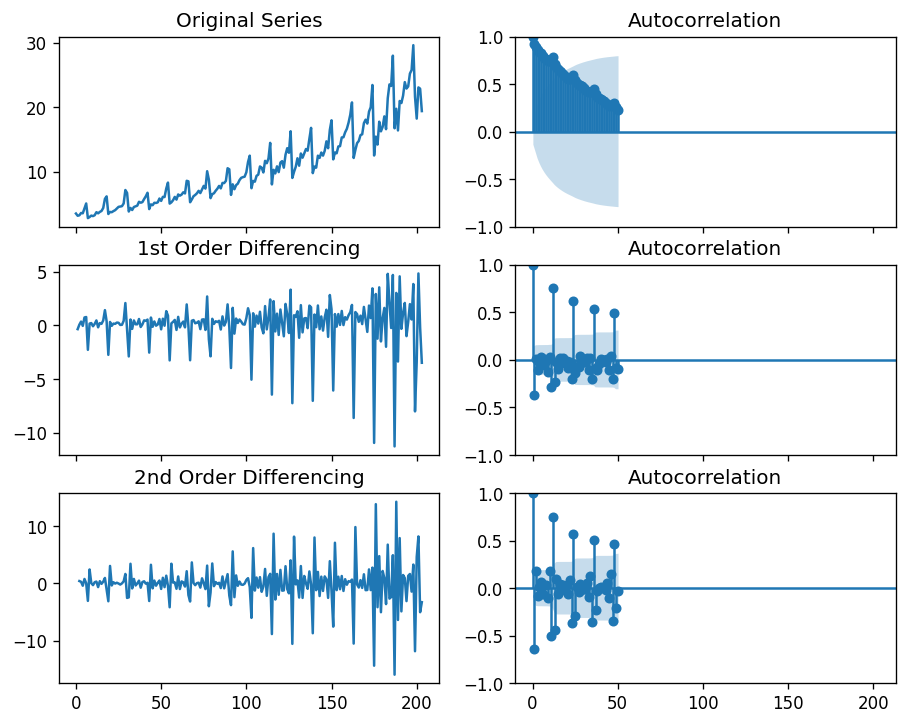

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1], lags=50, alpha=0.05)

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1], lags=50, alpha=0.05)

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1], lags=50, alpha=0.05)

plt.show()

- Para los datos anteriores, podemos ver que la serie de tiempo alcanza la estacionariedad con dos órdenes de diferenciación.



# **6. Cómo encontrar el orden del término AR (p)** <a class="anchor" id="6"></a>

[Tabla de contenidos](#0.1)


- El siguiente paso es identificar si el modelo necesita algún término AR. Descubriremos el número requerido de términos AR inspeccionando el **grafico de Autocorrelación parcial (PACF)**.


- La **autocorrelación parcial** puede imaginarse como la correlación entre la serie y su retraso, después de excluir las contribuciones de los retrasos intermedios. 
    - PACF transmite la correlación pura entre un retraso y la serie.
    - De esta manera, sabremos si ese retraso es necesario en el término AR o no.


- La autocorrelación parcial del retraso (k) de una serie es el coeficiente de ese retraso en la ecuación de autorregresión de Y.

$$Yt = \alpha0 + \alpha1 Y{t-1} + \alpha2 Y{t-2} + \alpha3 Y{t-3}$$


- Es decir, supongamos, si Y_t es la serie real e Y_t-1 es el retraso 1 de y, entonces la autocorrelación parcial de lag 3 (Y_t-3) es el coeficiente $\alpha_3$ de Y_t-3 en la ecuación anterior.

Algunas reglas generales:
- Utilizar un orden del término AR p igual al numero de *lags* que cruzan el límite de significancia en el gráfico PACF.
- Utilizar un orden del término MA q igual al numero de *lags* que cruzan el límite de significancia en el gráfico ACF.
- Si el ACF corta en el lag q y el PACF corta en el lag p, se recomienda empezar con un modelo ARIMA(p, d, q).
- Si sólo el PACF decae después del lag p, se recomienda empezar con un modelo AR(p).
- Si sólo el ACF decae después del lag q, se recomienda empezar con un modelo MA(q).
Estas pautas proporcionan un punto de partida útil al seleccionar los órdenes de un modelo ARIMA y pueden ser ajustadas según las características específicas de los datos en cuestión.

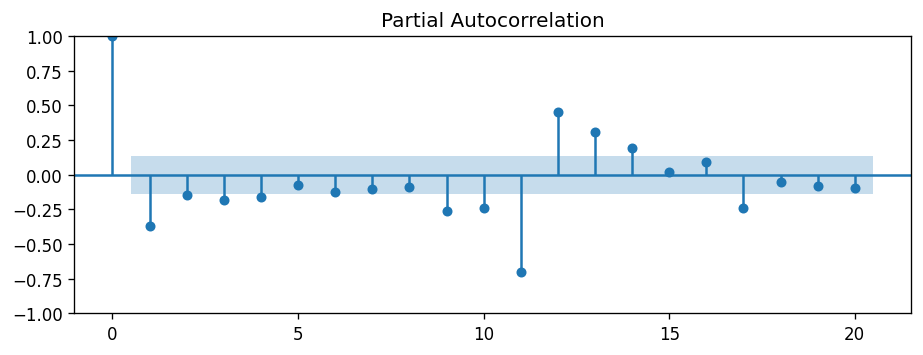

In [20]:
# PACF
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plot_pacf(df.value.diff().dropna(), lags=20, alpha=0.05)
plt.show()

- Podemos ver que hay 1 lag muy por encima de la línea de significancia. 
- Por tanto, fijamos el valor de p en 1.

# **7. Cómo encontrar el orden del término de MA (q)** <a class="anchor" id="7"></a>

[Tabla de contenidos](#0.1)


- Al igual que miramos la trama PACF para obtener el número de términos AR, veremos el gráfico **ACF** para el número de términos de MA.
    - Un término MA es técnicamente, el error del pronóstico rezagado.


- El ACF dice cuántos términos de MA se requieren para eliminar cualquier autocorrelación en la serie estacionarizada.


- Veamos el gráfico de autocorrelación de la serie diferenciada.

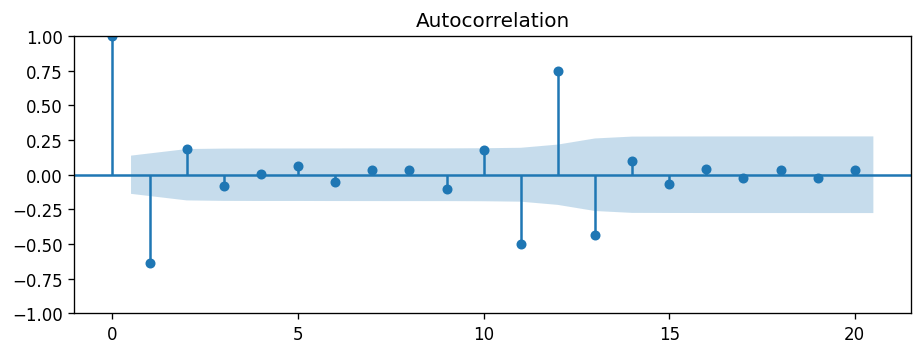

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plot_acf(df.value.diff().diff().dropna(), lags=20, alpha=0.05)

plt.show()

- Podemos ver que 2 retrasos están muy por encima de la línea de significancia.
    - Por tanto, arreglaremos q = 2. 
    - Si hay dudas, tiraremos con el modelo más simple que explica suficientemente el Y.

# **8. Cómo gestionar cuando una serie temporal está ligeramente sub o sobre diferenciada** <a class="anchor" id="8"></a>

[Tabla de contenidos](#0.1)


- Puede suceder que la serie de tiempo esté ligeramente sub-diferenciada. 
    - Diferenciarlo una vez más lo hará ligeramente sobre-diferenciado. 

- Si la serie está ligeramente sub-diferenciada, agregar uno o más términos AR adicionales generalmente la convierte.
    - Del mismo modo, si está ligeramente sobre-diferenciado, intentaremos agregar un término MA adicional.

# **9. Cómo construir el modelo ARIMA** <a class="anchor" id="9"></a>


[Tabla de contenidos](#0.1)


Ahora, hemos determinado los valores de p, d y q. Tenemos todo lo necesario para adaptarse al modelo ARIMA.

- Usaremos la implementación ARIMA() del paquete `statsmodels`.

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tabulate import tabulate

# ARIMA Model
model = ARIMA(df.value, order=(1,2,2))
# model = SARIMAX(df.value, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -416.561
Date:                Thu, 10 Apr 2025   AIC                            841.122
Time:                        08:20:47   BIC                            854.355
Sample:                             0   HQIC                           846.476
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3272      0.046      7.133      0.000       0.237       0.417
ma.L1         -1.9901      0.539     -3.691      0.000      -3.047      -0.933
ma.L2          0.9994      0.542      1.845      0.0

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


El resumen del modelo muestra mucha información sobre el proceso de ajuste:

1. **Estadísticas de Ajuste del Modelo**: Esta parte incluye varias estadísticas que ayudan a evaluar qué tan bien el modelo se ajusta a los datos observados:

    - Log-Likelihood (Logaritmo de la Verosimilitud): Una medida de qué tan bien el modelo explica los datos observados, donde valores más negativos indican un ajuste deficiente a los datos y valores más cercanos a cero indican un mejor ajuste.

    - AIC (Criterio de Información de Akaike): Una métrica de bondad de ajuste que equilibra el ajuste del modelo con su complejidad. Cuanto menor el valor de AIC mejor es el modelo.

    - BIC (Criterio de Información Bayesiano): Similar al AIC, pero penaliza más la complejidad del modelo. Al igual que con el AIC, valores más bajos de BIC indican un mejor ajuste.

    - HQIC (Criterio de Información de Hannan-Quinn): Otro criterio de selección de modelo, similar al AIC y al BIC.

2. **Coeficientes**: Esta tabla lista los coeficientes estimados para los parámetros del modelo. Incluye tanto los parámetros autoregresivos (AR) como los parámetros de media móvil (MA), así como cualquier variable exógena si se incluyen en el modelo. También incluye los errores estándar asociados con los coeficientes estimados para indicar la incertidumbre de dichas estimaciones, sus p-values, que se utilizan para evaluar la significancia de cada coeficiente, y el intervalo de confianza del 95%.
    - coef: Coeficiente estimado para el término. Magnitud y dirección del efecto del término en la predicción.
    - std err: Error estándar del coeficiente. Menor valor indica mayor precisión en la estimación del coeficiente.
    - z: Estadístico estandarizado (z=coef/std err). Mayor valor absoluto sugiere que el coeficiente es significativamente diferente de cero.
    - P>|z|: Si el término es estadísticamente significativo (menor que 0.05).

3. **Diagnósticos del modelo**: Esta sección proporciona información sobre los residuos. Las diferencias entre los valores observados (valores de entrenamiento) y los valores predichos por el modelo.

    - Prueba Ljung-Box: Una prueba de autocorrelación en los residuos.

    - Prueba de Jarque-Bera: Una prueba de normalidad de los residuos.

    - Asimetría y curtosis: Medidas de la forma de la distribución de los residuos.

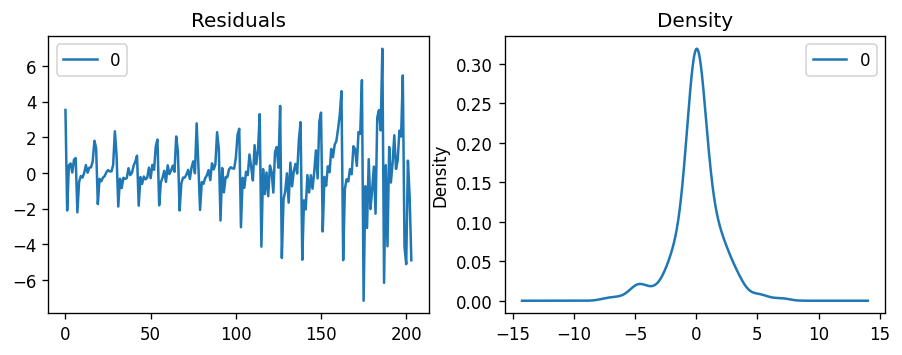

In [23]:
# errores residuales
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

- Los errores residuales parecen estar bien con una media casi cero y una varianza uniforme.
- Grafiquemos los valores reales contra los valores ajustados usando **plot_predict()**.

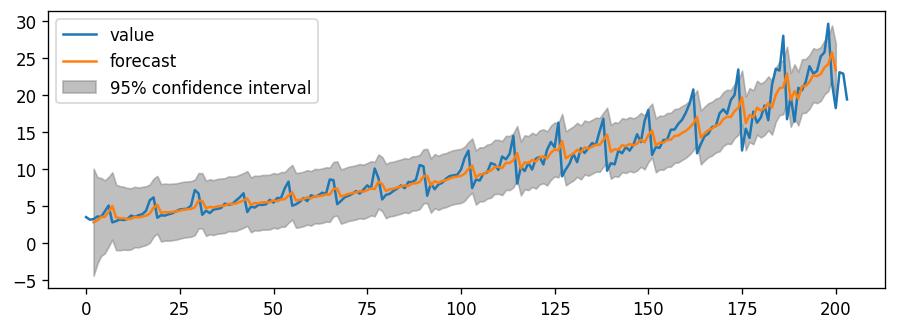

In [24]:
from statsmodels.graphics.tsaplots import plot_predict

# Actual vs Fitted
plot_predict(model_fit, 2, 200, dynamic=False, ax=df.plot())

plt.show()

- Cuando establecemos dynamic=False, los valores retrasados ​​en la muestra se usan para la predicción.
    - Es decir, el modelo se entrena hasta el valor anterior para hacer la próxima predicción.
    - Esto puede hacer que el pronóstico ajustado y los reales se vean artificialmente bien.

- Parece que tenemos un modelo Arima decente.
    - Pero, no podemos decir que este es el mejor modelo ARIMA porque en realidad no hemos pronosticado el futuro y comparamos el pronóstico con el rendimiento real.

- La verdadera validación que necesitamos ahora es la validación cruzada fuera del tiempo (Out-of-Time cross-validation).

# **10. Encontrar el modelo ARIMA óptimo utilizando la validación cruzada fuera del tiempo** <a class="anchor" id="10"></a>


[Tabla de contenidos](#0.1)


- En la validación cruzada fuera del tiempo, avanzamos hacia atrás en el tiempo y pronosticamos en el futuro a tantos pasos como tomamos en el pasado.
    - Luego comparamos el pronóstico con los valores reales. 
- Para hacerlo, crearemos los datasets de entrenamiento y prueba dividiendo la serie temporal en 2 partes contiguas en una proporción razonable basada en la frecuencia de tiempo de la serie.

In [25]:
from statsmodels.tsa.stattools import acf

# Crear entrenamiento y prueba
train_size = 190
train = df.value[:train_size+1]
test = df.value[train_size:]

- Ahora, construimos el modelo ARIMA en el dataset de entrenamiento, pronosticaremos y graficaremos.

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  191
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -378.763
Date:                Thu, 10 Apr 2025   AIC                            765.527
Time:                        08:20:48   BIC                            778.494
Sample:                             0   HQIC                           770.780
                                - 191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2966      0.054      5.525      0.000       0.191       0.402
ma.L1         -1.9970      1.545     -1.293      0.196      -5.025       1.031
ma.L2          0.9996      1.547      0.646      0.5

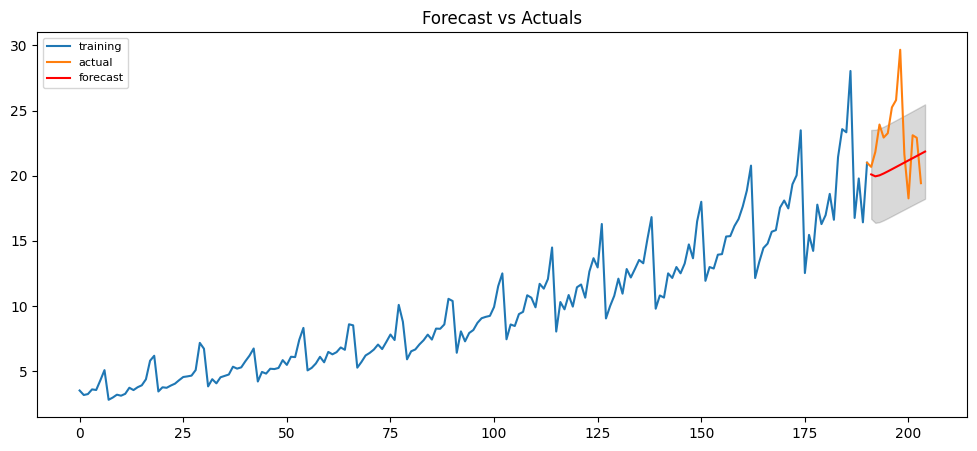

In [26]:
from tabulate import tabulate

# Build del modelo
model = ARIMA(train, order=(1, 2, 2))
model_fit = model.fit()
print(model_fit.summary())

# Pronóstico
steps = len(df) - train_size
fc_series = model_fit.forecast(steps=steps, alpha=0.05)  # 95% conf
conf = model_fit.get_forecast(steps=steps).conf_int(alpha=0.05)

# pandas series
lower_series = conf['lower value']
upper_series = conf['upper value']

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast', color='red')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- De la tabla anterior, el modelo ARIMA(1,2,2) parece generar un pronóstico correcto.
    - Los valores observados reales se encuentran dentro de la banda de confianza del 95%.

- Podemos variar el orden de diferenciación y aumentar iterativamente p y q hasta 5 para ver qué modelo da el menor AIC y también buscar un gráfico que proporcione valores reales y pronósticos más cercanos.

- Mientras hacemos esto, vigilamos los valores p de los términos AR y MA en el resumen del modelo.
    - Deben estar tan cerca de cero, idealmente, menos de 0.05.

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  191
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -398.528
Date:                Thu, 10 Apr 2025   AIC                            805.056
Time:                        08:20:49   BIC                            818.023
Sample:                             0   HQIC                           810.310
                                - 191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4424      0.085     -5.208      0.000      -0.609      -0.276
ar.L2         -0.0933      0.084     -1.105      0.269      -0.259       0.072
ma.L1         -1.0000      9.709     -0.103      0.9

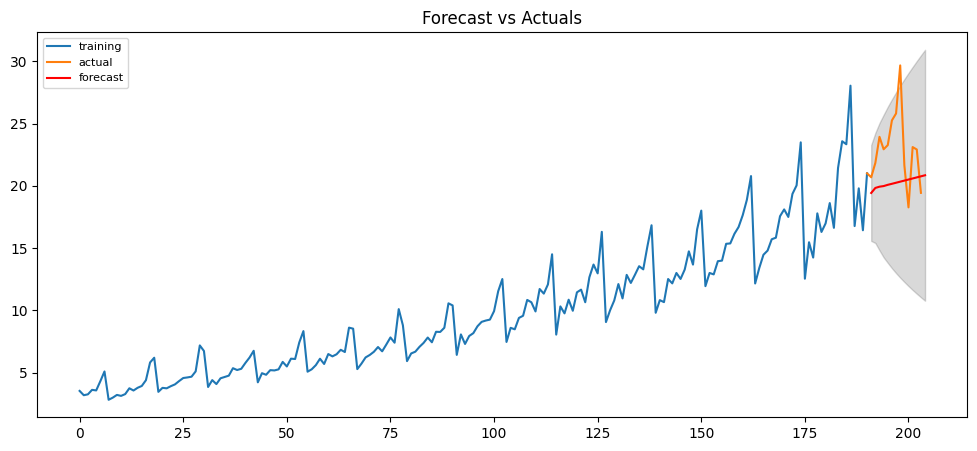

In [27]:
# Build Model
# model = ARIMA(train, order=(1, 2, 2))
model = ARIMA(train, order=(2, 2, 1))
model_fit = model.fit()
print(model_fit.summary())

# Pronóstico
fc_series = model_fit.forecast(steps, alpha=0.05)  # 95% conf
conf = model_fit.get_forecast(steps).conf_int(alpha=0.05)

# pandas series
lower_series = conf['lower value']  # pd.Series(conf[:, 0], index=test.index)
upper_series = conf['upper value']  # pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast', color='red')
plt.fill_between(lower_series.index, lower_series,
                 upper_series,  color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

- El AIC se ha reducido, lo cual es bueno.
- Principalmente, los valores P de los términos X son inferiores a <0.05, lo cual es excelente.
- En general, este modelo es mucho mejor.

### Validación cruzada fuera del tiempo

In [28]:
from sklearn.metrics import mean_squared_error

data = df.value

# Parámetros de la validación cruzada
initial_train_size = int(len(data) * 0.8)  # 80% para entrenamiento inicial
steps = 10  # Número de pasos a predecir en cada iteración
n_backtests = int((len(data) - initial_train_size) / steps)

# Listas para almacenar resultados
predictions = []
actuals = []

# Validación cruzada fuera del tiempo
for i in range(n_backtests):
    # Dividir datos en entrenamiento y prueba
    train_data = data[:initial_train_size + i * steps]
    test_data = data[initial_train_size + i * steps: initial_train_size + (i + 1) * steps]

    # Entrenar el modelo ARIMA
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Hacer predicciones
    forecast = model_fit.forecast(steps=steps)
    predictions.extend(forecast)
    actuals.extend(test_data)

# Evaluar el rendimiento
mse = mean_squared_error(actuals, predictions)
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")

# Mostrar resultados
results = pd.DataFrame({"Actual": actuals, "Predicted": predictions})

results.head()

Error Cuadrático Medio (MSE): 16.09


,Actual,Predicted
0,12.154552,18.615225
1,13.402392,17.896404
2,14.459239,17.657575
3,14.795102,17.578225
4,15.705248,17.551861


# **11. Métricas de precisión para el pronóstico de series temporales** <a class="anchor" id="11"></a>


[Table of Contents](#0.1)


Las métricas de precisión comúnmente utilizadas para juzgar los pronósticos son:

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)


Por lo general, usaremos tres métricas de precisión:

1. MAPE
2. Correlation 
3. Min-Max Error 


- Los tres anteriores son errores porcentuales que varían entre 0 y 1. 
- De esta manera, podemos juzgar cuán bueno es el pronóstico independientemente de la escala de la serie.


In [29]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast.to_numpy()[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast.to_numpy()[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc_series, test.values)

{'mape': 0.12869829702063326,
 'me': -2.5710790398291214,
 'mae': 3.104508659284554,
 'mpe': -0.10015635058736447,
 'rmse': 3.781309020208951,
 'acf1': nan,
 'corr': 0.0033826053347967592,
 'minmax': 0.1273225013898246}

- Around 23.22% MAPE implies the model is about 76.78% accurate in predicting the next 15 observations. Now we know how to build an ARIMA model manually. 

- But, we should also know how to automate the best model selection process. So, we will discuss it next.



- Alrededor del 23.22% MAPE implica que el modelo es aproximadamente 76.78% preciso para predecir las próximas 15 observaciones.

# **12. Pronóstico Auto Arima en Python** <a class="anchor" id="12"></a>


[Tabla de contenidos](#0.1)


- En Python, el paquete `pmDarima` proporciona la función `auto_arima()` que puede usarse para automatizar el proceso de pronóstico ARIMA en Python.
    - https://alkaline-ml.com/pmdarima/

- `auto_arima()` utiliza un enfoque gradual para buscar múltiples combinaciones de parámetros p, d, q y eliger el mejor modelo que tiene el menor AIC.

- Primero necesitamos instalar el paquete `pmDarima`.

In [30]:
# ! pip install "numpy<2"
# ! pip install pmdarima

In [31]:
import pandas as pd
import numpy as np

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

NumPy version: 1.26.4
Pandas version: 2.2.3


In [32]:
import pmdarima as pm

model = pm.auto_arima(y=df.value,
                      start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3,  # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True
                      )

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=874.416, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1602.665, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=913.571, Time=0.05 sec


 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1392.713, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=865.809, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=867.147, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=871.437, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=868.483, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=858.292, Time=0.38 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=859.374, Time=0.36 sec


KeyboardInterrupt: 

Parámetros relevantes:

| **Parámetro**       | **Descripción**                                                                                   |
|----------------------|---------------------------------------------------------------------------------------------------|
| `y`                 | La serie temporal que deseas modelar.                                                            |
| `start_p`, `max_p`  | Rango de valores para el orden del componente AR ($p$).                                           |
| `start_q`, `max_q`  | Rango de valores para el orden del componente MA ($q$).                                           |
| `d`                 | Orden de diferenciación. Si no se especifica, lo calcula automáticamente.                         |
| `seasonal`          | Indica si se debe ajustar un modelo SARIMA ($P$, $D$, $Q$, $m$).                                 |
| `m`                 | Período de estacionalidad (por ejemplo, 12 para datos mensuales con estacionalidad anual).        |
| `start_P`, `max_P`  | Rango de valores para el orden del componente AR estacional ($P$).                                |
| `start_Q`, `max_Q`  | Rango de valores para el orden del componente MA estacional ($Q$).                                |
| `D`                 | Orden de diferenciación estacional. Si no se especifica, lo calcula automáticamente.              |
| `information_criterion` | Criterio de selección del modelo: `'aic'` (default), `'bic'`, `'hqic'`, o `'oob'` (out-of-bag). |
| `trace`             | Si es `True`, muestra información detallada sobre cada modelo evaluado.                          |
| `stepwise`          | Si es `True`, usa un enfoque stepwise (más rápido) en lugar de probar todas las combinaciones.    |
| `n_jobs`            | Número de núcleos de CPU para acelerar la búsqueda paralelizada.                                  |

# **13. Cómo interpretar los gráficos residuales en el modelo ARIMA** <a class="anchor" id="13"></a>


[Tabla de contenidos](#0.1)

Revisemos los gráficos residuales usando `stepwise_fit`.

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

## **Interpretación de las trazas en gráficos de  diagnóstico**


**Residual estandarizado**: Los errores residuales parecen fluctuar alrededor de una media de cero y tienen una varianza uniforme.


**Histograma**: La gráfica de densidad sugiere una distribución normal con una pequeña inclinación media hacia la derecha.


**Cuantiles teóricos**: Principalmente los puntos caen perfectamente en línea con la línea roja.Cualquier desviación significativa implicaría que la distribución esté sesgada.


**Correlograma**: El correlograma, (o gráfico ACF) muestra que los errores residuales no están autocorrelacionados. La gráfica de ACF implicaría que hay algún patrón en los errores residuales que no se explican en el modelo. Por lo tanto, tendremos que buscar más X's (predictores) para el modelo.


En general, el modelo parece tener un buen ajuste. Usémoslo para pronosticar.

In [ ]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True) # forecast, confidence_intervals
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()

# **14. Modelo de SARIMA en Python** <a class="anchor" id="14"></a>


[Tabla de contenidos](#0.1)


- El modelo ARIMA simple tiene un problema. No soporta estacionalidad.


- Si la serie de tiempo ha definido la estacionalidad, entonces debemos optar por **Seasonal ARIMA** (**SARIMA**) que utiliza la diferenciación estacional.


- La diferenciación estacional es similar a la diferenciación regular, pero, en lugar de restar términos consecutivos, restamos el valor de la temporada anterior.


- El modelo se representará como **Sarima (P, D, Q)x(P, D, Q)**, donde, P, D y Q son SAR, el orden de las diferencias estacionales y los términos SMA respectivamente y 'X' es la frecuencia de la serie de tiempo.Si el modelo tiene patrones estacionales bien definidos, entonces aplique d = 1 para una frecuencia "x" dada.


- Debemos establecer los parámetros del modelo de modo que D nunca exceda uno. 
    - Y la diferencia total "d + D" nunca excede 2. 
    - Deberíamos tratar de mantener solo términos SAR o SMA si el modelo tiene componentes estacionales.


- Ahora, construiremos un modelo Sarima en el conjunto de datos de la serie temporal.

In [ ]:
data = pd.read_csv('../../data/ARIMA/dataset.txt', parse_dates=['date'], index_col='date')

In [ ]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(16,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasonal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Drug Sales - Time Series Dataset', fontsize=16)
plt.show()

- Podemos ver que los picos estacionales están intactos después de aplicar la diferencia habitual (retraso 1). Mientras que se rectifica después de la diferenciación estacional.

- Ahora, construyamos el modelo Sarima usando pmdarima `auto_arima()`.
- Para hacerlo, necesitamos establecer `seasonal=True`, la frecuencia `M = 12` para la serie mes a mes y forzar `D = 1`.

In [ ]:
import pmdarima as pm

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

El modelo ha estimado que los valores de AIC y P de los coeficientes parecen significativos.

Veamos el gráfico de diagnóstico residual.

- El mejor modelo SARIMAX(3, 0, 0)x(0, 1, 1, 12) tiene una AIC de 528.6 y los valores de P son significativos.

Vamos a pronosticar para los próximos 24 meses.

In [ ]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

Aquí tenemos un buen pronóstico que captura el patrón de demanda estacional esperado!

# **15. Modelo SARIMAX con variables exogéneas** <a class="anchor" id="15"></a>


[Tabla de contenidos](#0.1)


- Ahora, forzaremos un predictor externo, también llamado *variable exógena* en el modelo.
    - El único requisito para usar una variable exógena es que también debemos conocer el valor de la variable durante el período de predicción.

- Queremos ver cómo se ve el modelo si forzamos el patrón de estacionalidad en el entrenamiento y el pronóstico.
    - El índice estacional es una buena variable exógena porque repite cada ciclo de frecuencia, 12 meses en este caso.
    - Siempre sabremos qué valores tendrá el índice estacional para los pronósticos futuros.
    - Calculemos el índice estacional para que pueda ser forzado como un predictor (exógeno) al modelo Sarimax.

In [ ]:
# Calcular índice estacional
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# componente estacional multiplicativo
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge con los datos base
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index
print(tabulate(df, headers='keys', tablefmt='psql'))

La variable exógena (índice estacional) está lista. Construyamos el modelo Sarimax.

In [ ]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

In [ ]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='red')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX - Final Forecast of Drug Sales - Time Series Dataset")
plt.show()

# **16. Referencias** <a class="anchor" id="16"></a>


[Tabla de contenidos](#0.1)


Las ideas y códigos en este notebook se han tomado de los siguientes sitios web.


1. https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

2. https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/


## Ejercicio:
1. Entrenar un modelo ARIMA para predecir predecir el consumo de combustible a 12 meses vista y evaluar su rendimiento usando validación cruzada fuera del tiempo.

- Usa el dataset 'fuel_consumption' de skforecast.
- Usa frecuancia mensual.

2. Vuelve a hacer el mismos entrenamiento usando 'Querosenos' como variable exógena

ref. https://github.com/skforecast/skforecast-datasets

[Ir al inicio](#0)

In [33]:
from skforecast.datasets import fetch_dataset
from tabulate import tabulate

# Cargar el dataset 'fuel_consumption'
data = fetch_dataset(name='fuel_consumption', raw=True)

# Explorar los datos
print(tabulate(data.head(), headers='keys', tablefmt='psql'))
print(tabulate(data.tail(), headers='keys', tablefmt='psql'))
print(f"Columnas del dataset: {data.columns}")


fuel_consumption
----------------
Monthly fuel consumption in Spain from 1969-01-01 to 2022-08-01.
Obtained from Corporación de Reservas Estratégicas de Productos Petrolíferos and
Corporación de Derecho Público tutelada por el Ministerio para la Transición
Ecológica y el Reto Demográfico. https://www.cores.es/es/estadisticas
Shape of the dataset: (644, 6)
+----+------------+----------+-------------+--------------+------------+-------------+
|    | Fecha      |     GLPs |   Gasolinas |   Querosenos |   Gasoleos |   Fueloleos |
|----+------------+----------+-------------+--------------+------------+-------------|
|  0 | 1969-01-01 | 133615   |      166875 |       123258 |     401185 |      912583 |
|  1 | 1969-02-01 | 126748   |      155467 |       114683 |     385360 |      851878 |
|  2 | 1969-03-01 | 107796   |      184984 |       109970 |     418956 |      873884 |
|  3 | 1969-04-01 |  96683.2 |      202320 |       108798 |     438976 |      755490 |
|  4 | 1969-05-01 |  79506.2 |   

In [34]:
# Convertir la columna 'Fecha' a índice temporal
data['Fecha'] = pd.to_datetime(data['Fecha'])
print(tabulate(data.describe(include='all'), headers='keys', tablefmt='psql'))

+-------+-------------------------------+----------+-------------+--------------+------------------+------------------+
|       | Fecha                         |     GLPs |   Gasolinas |   Querosenos |         Gasoleos |        Fueloleos |
|-------+-------------------------------+----------+-------------+--------------+------------------+------------------|
| count | 644                           |    644   |       644   |        644   |    644           |    644           |
| mean  | 1995-10-16 14:00:44.720496896 | 181924   |    523206   |     306434   |      1.71919e+06 | 996720           |
| min   | 1969-01-01 00:00:00           |  69601.3 |     97462.2 |      39497.6 | 385360           | 423045           |
| 25%   | 1982-05-24 06:00:00           | 141436   |    404834   |     200031   | 967777           | 744643           |
| 50%   | 1995-10-16 12:00:00           | 178010   |    497412   |     249456   |      1.58267e+06 | 907605           |
| 75%   | 2009-03-08 18:00:00           

In [35]:
data.set_index('Fecha', inplace=True)
data = data.asfreq('MS')  # Frecuencia inicio de mes
print(tabulate(data.head(20), headers='keys', tablefmt='psql'))

+---------------------+----------+-------------+--------------+------------+------------------+
| Fecha               |     GLPs |   Gasolinas |   Querosenos |   Gasoleos |        Fueloleos |
|---------------------+----------+-------------+--------------+------------+------------------|
| 1969-01-01 00:00:00 | 133615   |      166875 |       123258 |     401185 | 912583           |
| 1969-02-01 00:00:00 | 126748   |      155467 |       114683 |     385360 | 851878           |
| 1969-03-01 00:00:00 | 107796   |      184984 |       109970 |     418956 | 873884           |
| 1969-04-01 00:00:00 |  96683.2 |      202320 |       108798 |     438976 | 755490           |
| 1969-05-01 00:00:00 |  79506.2 |      206259 |       103554 |     467452 | 729964           |
| 1969-06-01 00:00:00 |  72091.2 |      208412 |       104792 |     463566 | 655314           |
| 1969-07-01 00:00:00 |  72515.2 |      265737 |       109992 |     503947 | 703709           |
| 1969-08-01 00:00:00 |  69601.3 |      

In [ ]:
data_sub = data[:500]

array([<AxesSubplot: xlabel='Fecha'>, <AxesSubplot: xlabel='Fecha'>,
       <AxesSubplot: xlabel='Fecha'>, <AxesSubplot: xlabel='Fecha'>,
       <AxesSubplot: xlabel='Fecha'>], dtype=object)

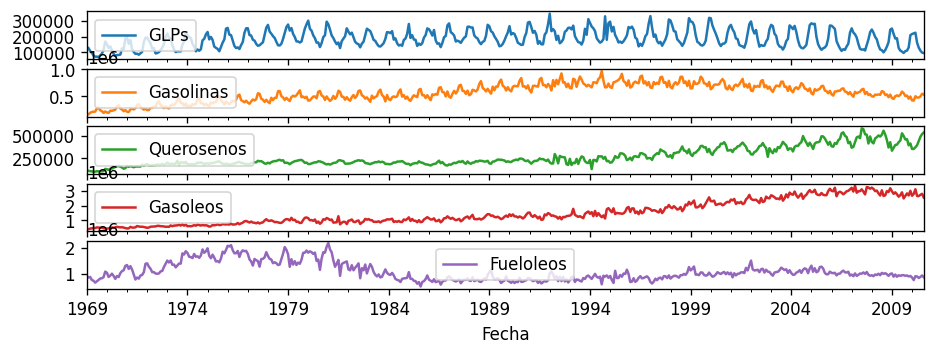

In [38]:
data_sub.plot(subplots=True)

In [39]:
# Entrenar el modelo SARIMA

model = pm.auto_arima(data_sub['GLPs'], exogenous=data_sub[['Querosenos']],
                      m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf', error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=12063.246, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=12329.683, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=11538.156, Time=1.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=11941.517, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=13596.881, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=11789.451, Time=0.06 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=11531.780, Time=2.53 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=11540.156, Time=0.42 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=12291.699, Time=1.31 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=11542.551, Time=2.70 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=11508.946, Time=2.98 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=11515.348, Time=0.93 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=29006570.310, Time=1.46 sec
 ARIMA(1,

/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(5,0,5)(2,0,1)[12]             : AIC=28.000, Time=5.22 sec
 ARIMA(5,0,5)(2,0,0)[12]             : AIC=inf, Time=9.91 sec
 ARIMA(5,0,5)(2,0,2)[12]             : AIC=inf, Time=10.51 sec
 ARIMA(5,0,5)(1,0,2)[12]             : AIC=inf, Time=9.32 sec
 ARIMA(4,0,5)(2,0,1)[12]             : AIC=inf, Time=nan sec
 ARIMA(4,0,4)(2,0,1)[12]             : AIC=11330.191, Time=28.48 sec
 ARIMA(5,0,5)(2,0,1)[12] intercept   : AIC=73112570.557, Time=3.68 sec

Best model:  ARIMA(5,0,5)(2,0,1)[12]          
Total fit time: 451.255 seconds


/anaconda/envs/azureml_py38/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/pmdarima/arima/_auto_solvers.py:40: RuntimeWarning: invalid value encountered in divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


In [ ]:
# Train-test

train = data[(data.index.get_level_values(0) >= '1969-01-01')
                 & (data.index.get_level_values(0) <= '2009-01-31')]

train

In [ ]:
test = data[(data.index.get_level_values(0) > '2009-01-31')]

test

In [ ]:
# Ajustar el modelo SARIMAX
model.fit(train['GLPs'])

In [ ]:
# Forecast
forecast = model.predict(n_periods=12, return_conf_int=True)

In [ ]:
# Predicciones
forecast_df = pd.DataFrame(forecast[0], index=test.index, columns=['Prediction'])

forecast_df

In [ ]:
# Graficando

import matplotlib.pyplot as plt
pd.concat([data_sub['GLPs'],forecast_df],axis=1).plot()


In [ ]:
# Futuros
forecast1=model.predict(n_periods=8, return_conf_int=True)
forecast_range=pd.date_range(start='2009-01-31', periods=8,freq='ME')

forecast1_df = pd.DataFrame(forecast1[0], index=forecast_range, columns=['Prediction'])